# Project Proposal: Machine Learning-Based Prediction of COVID-19 Diagnosis


The rapid spread of COVID-19 has underscored the critical need for accurate and efficient diagnostic methods. Timely identification of positive cases can greatly impact medical treatment outcomes and alleviate the strain on healthcare systems. In response to this urgent challenge, we propose a project that leverages machine learning techniques to predict COVID-19 diagnoses based on symptoms.

Section 1: Questions to Answer
1. What questions do you want to answer?

Can we accurately predict COVID-19 diagnosis based on symptoms?
Which symptoms are most indicative of a positive COVID-19 test?
2. Why is your proposal important in today’s world?

Accurate predictions can lead to improved medical treatment through timely interventions.
Efficient screening can reduce the healthcare burden, making resources more accessible.
The project's impact extends beyond COVID-19, serving as a blueprint for future disease predictions.
Section 2: Initial Hypotheses
1. Develop Initial Hypotheses:

There is a significant correlation between certain symptoms and a positive COVID-19 diagnosis.
Machine learning models can effectively predict COVID-19 outcomes based on symptoms.
2. Identify Patterns and Features:

For Data Analysis (DA) track, patterns in the data and important features will be identified.
For Machine Learning (ML) track, we will explore various ML models and justify their relevance.
Section 3: Data Analysis Approach
1. Approach to Prove/Disprove Hypotheses:

We will employ statistical tests (e.g., Chi-Square, ANOVA) and exploratory data analysis (EDA) to validate hypotheses.
2. Feature Engineering Techniques:

Relevant tasks will include handling missing values, encoding categorical variables, etc.
3. Justify Data Analysis Approach:

The chosen approach aligns with the dataset's nature and our research objectives.
4. Identify Important Patterns (EDA):

Data will be visualized to identify patterns and relationships between symptoms and COVID-19 outcomes.
Section 4: Machine Learning Approach
1. Method for COVID-19 Predictions:

We plan to use [Specify ML method(s)] for its suitability to the dataset and research goals.
2. Improve Model Accuracy:

Steps will be taken to enhance model accuracy, including hyperparameter tuning and feature scaling.
3. Compare Multiple Models:

We will compare at least four ML models, justifying each choice based on relevant cost functions.
4. Report Characteristics of Important Features:

Post feature engineering, a table will be presented with total numbers and percentages of important features.
5. Perform Cost Function Analysis:

Important cost functions will be implemented to assess and compare model performance.
Additional Considerations:
Training and Validation Split:

Specify the training and validation split ratio (e.g., 4:1) and date ranges.
Test Set:

Define the test set and its date range.
Dataset Source:

Mention the source of the dataset (e.g., 'ABC' government website).
This project aims to contribute to the global effort in combating COVID-19 by providing accurate and efficient diagnostic predictions. The following sections detail our methodology, hypotheses, and proposed approach to fulfill this objective.

Feel free to customize this introduction based on the specifics of your project and any additional information you may want to include.

In [1]:
# Frist import all  Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")


# import data from csv file

df=pd.read_csv(r"/content/corona_tested_006.csv")

In [3]:
# open the data observe the data

df.head()

Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [4]:
df.shape

(278848, 11)

In [5]:
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [6]:
#rename the columns some columns

df=df.rename(columns={'Ind_ID':"ID","Corona":"Test_result"})

In [7]:
df.columns

Index(['ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Test_result', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Test_result          278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [9]:
# only one numric feature there so check the discribe to all catogorical values


df.describe(include=[object])

Test_date Cough_symptoms   Fever Sore_throat Shortness_of_breath  \
count       278848         278848  278848      278848              278848   
unique          51              5       5           5                   5   
top     20-04-2020          False   False       False               False   
freq         10921         127531  137774      212584              212842   

       Headache Test_result Age_60_above     Sex Known_contact  
count    278848      278848       278848  278848        278848  
unique        5           3            3       3             3  
top       False    negative         None  female         Other  
freq     212326      260227       127320  130158        242741

In [10]:
# check the any missing values

df.isnull().sum()

ID                     0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Test_result            0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

<Axes: >

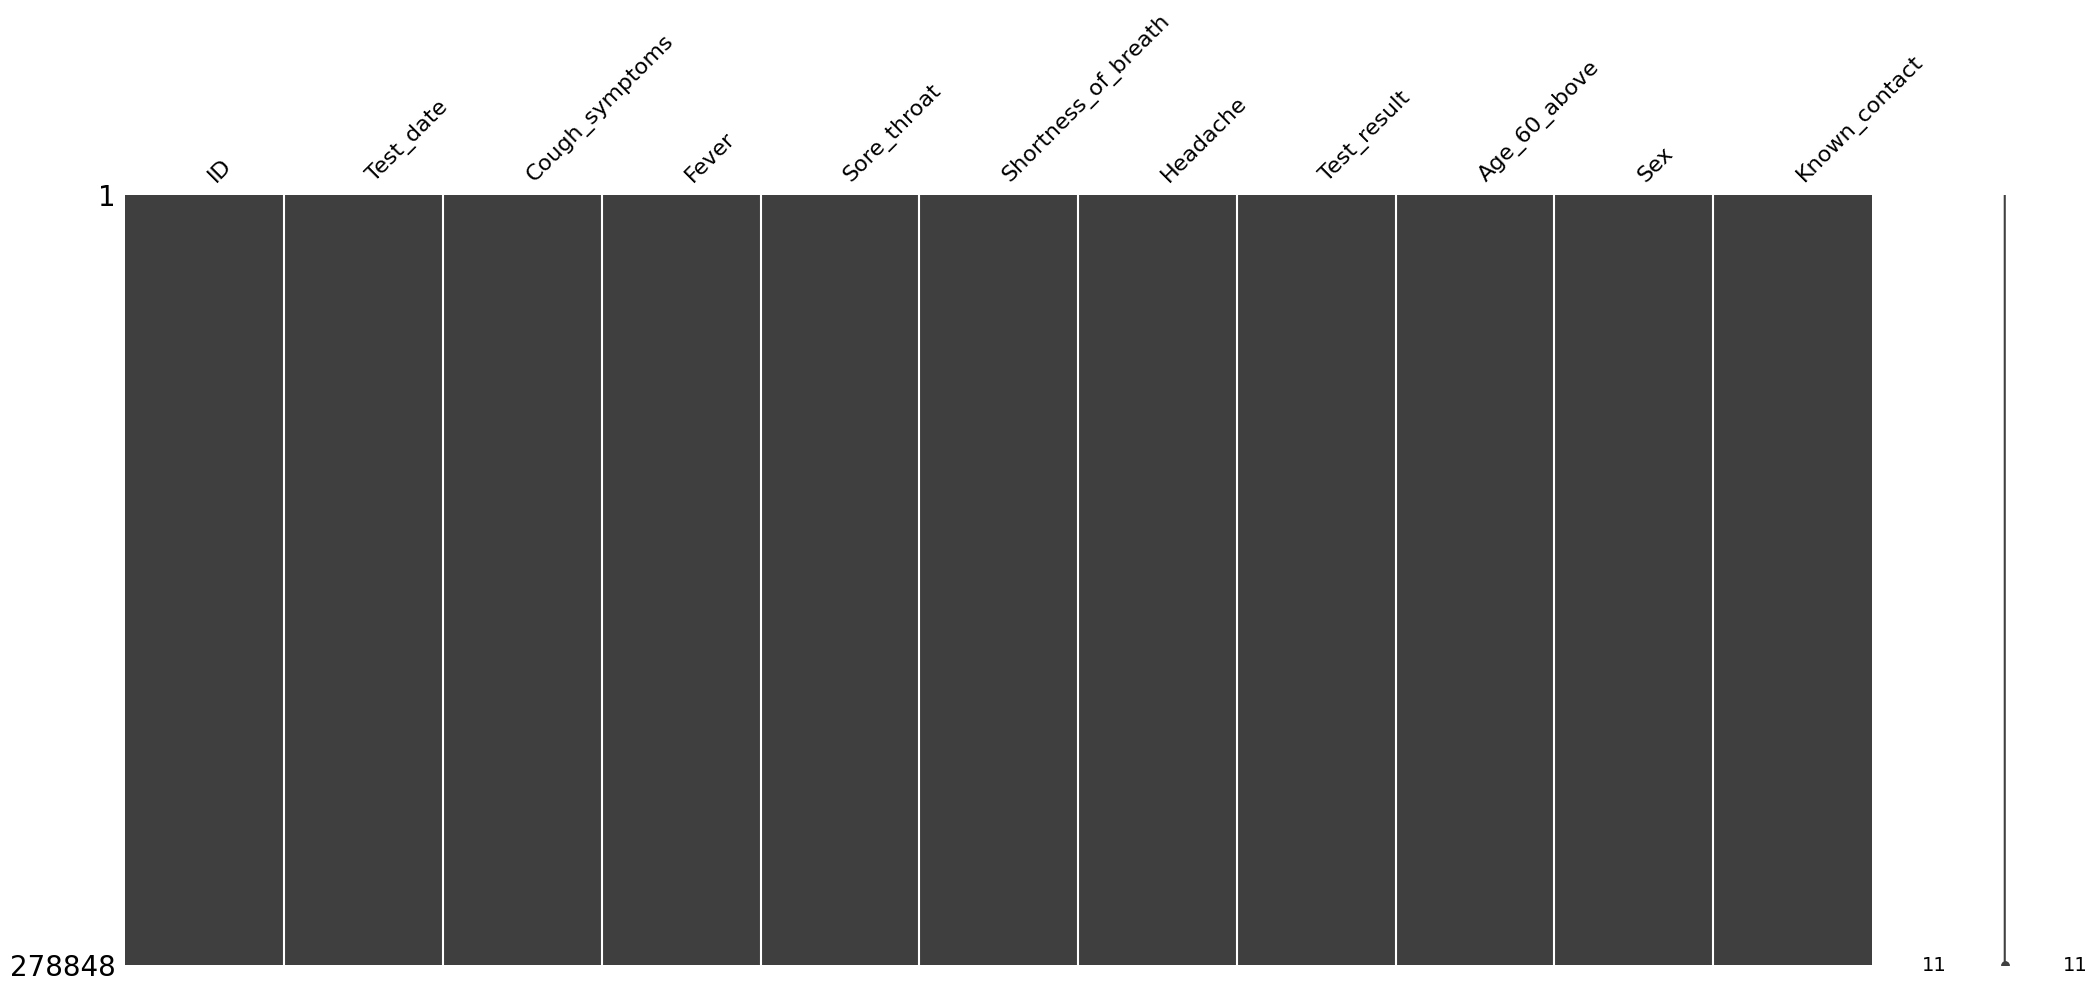

In [11]:
# Let's check the presence of missing values using missingno.
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(df)

In [12]:
# find out the other way
for i in df:
  print(i, ":", df[i].unique())

ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
Cough_symptoms : ['TRUE' 'FALSE' 'None' False True]
Fever : ['FALSE' 'TRUE' 'None' False True]
Sore_throat : ['TRUE' 'FALSE' 'None' False True]
Shortness_of_breath : ['FALSE' 'TRUE' 'None' False True]
Headache : ['FALSE' 'TRUE' 'None' False True]
Test_result :

In above data it not null value but there are None are in sting are present

In [13]:
df['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

Some of value are in captial and small letters we have to convert in single form

In [14]:
df['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

252 Are the None values

In [15]:
# Replacing alphabetical error with correct one.
df['Cough_symptoms'].replace('FALSE',False,inplace=True)
df['Cough_symptoms'].replace('TRUE',True,inplace=True)


In [16]:
# check the changes has done or not
df['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

 this catogorial data so Fill the none value with the mode

In [17]:
df['Cough_symptoms'].mode()

0    False
Name: Cough_symptoms, dtype: object

In [18]:
# Replace the 'None' with mode

df['Cough_symptoms'].replace('None',False,inplace=True)

In [19]:
df['Cough_symptoms'].value_counts()

False    236620
True      42228
Name: Cough_symptoms, dtype: int64

In [20]:
# all columns content the none value so insted of doing on single  columns use loop and convert all columns none.


columns = ['Fever','Sore_throat','Shortness_of_breath','Headache']
for i in columns:
    print(i,": ")
    print(df[i].value_counts())
    df[i].replace('FALSE',False,inplace=True)
    df[i].replace('TRUE',True,inplace=True)
    a = list(df[i].mode())
    df[i].replace('None',a[0],inplace=True)
    print(df[i].value_counts())
    print()

Fever : 
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
False    257096
True      21752
Name: Fever, dtype: int64

Sore_throat : 
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
False    276922
True       1926
Name: Sore_throat, dtype: int64

Shortness_of_breath : 
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
False    277271
True       1577
Name: Shortness_of_breath, dtype: int64

Headache : 
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
False    276434
True       2414
Name: Headache, dtype: int64



In [21]:
# In 'Test_result' column 'negative' values are more

df['Test_result'].mode()

0    negative
Name: Test_result, dtype: object

In [22]:
# Here we do replacement
df['Test_result'].replace('other','negative',inplace=True)

In [23]:
# we replaced 'other' with 'negative'
df['Test_result'].value_counts()

negative    264119
positive     14729
Name: Test_result, dtype: int64

In [24]:
# Same process for 'Age_60_above' column.
df['Age_60_above'].mode()

0    None
Name: Age_60_above, dtype: object

In [25]:
df['Age_60_above'].replace('None','No',inplace=True)

In [26]:
df['Age_60_above'].value_counts()

No     253023
Yes     25825
Name: Age_60_above, dtype: int64

In [27]:
# Same process for 'Sex' column
df['Sex'].mode()

0    female
Name: Sex, dtype: object

In [28]:
df['Sex'].replace('None','female',inplace=True)

In [29]:
df['Sex'].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [30]:
df.to_csv('covid_cleaned_data.csv')

check the correlationship columns

In [31]:
df.corr()

ID  Cough_symptoms     Fever  Sore_throat  \
ID                   1.000000       -0.053530 -0.052066    -0.086443   
Cough_symptoms      -0.053530        1.000000  0.454386     0.115637   
Fever               -0.052066        0.454386  1.000000     0.122832   
Sore_throat         -0.086443        0.115637  0.122832     1.000000   
Shortness_of_breath -0.087001        0.106749  0.126070     0.197540   
Headache            -0.091638        0.116350  0.168841     0.323132   

                     Shortness_of_breath  Headache  
ID                             -0.087001 -0.091638  
Cough_symptoms                  0.106749  0.116350  
Fever                           0.126070  0.168841  
Sore_throat                     0.197540  0.323132  
Shortness_of_breath             1.000000  0.202538  
Headache                        0.202538  1.000000

ID vs. Symptoms:

The diagonal elements (top-left to bottom-right) have a correlation of 1, as they represent the variable's correlation with itself, which is always perfect.
Cough Symptoms vs. Other Variables:

Cough symptoms have a moderate positive correlation with Fever (0.454) and a weaker positive correlation with Sore throat, Shortness of breath, and Headache.
The negative values indicate no substantial negative correlation.
Fever vs. Other Variables:

Fever has a moderate positive correlation with Cough symptoms (0.454), and a weaker positive correlation with Sore throat and Headache.
Sore Throat vs. Other Variables:

Sore throat has a moderate positive correlation with Headache (0.323) and a weaker positive correlation with Fever and Shortness of breath.
Shortness of Breath vs. Other Variables:

Shortness of breath has a weak positive correlation with Sore throat and Headache.
Headache vs. Other Variables:

Headache has a moderate positive correlation with Sore throat (0.323) and Fever.
Communication:
You can present the correlations in a clear and concise manner in your project documentation. For example:

"Cough symptoms exhibit a moderate positive correlation with Fever (0.454), while Sore throat and Headache show weaker positive correlations (0.115 and 0.116, respectively)."
"Fever demonstrates a moderate positive correlation with Cough symptoms (0.454) and a weaker positive correlation with Sore throat and Headache."
Remember to consider the strength of correlation (weak, moderate, strong) and its direction (positive or negative) when interpreting the relationships between variables. Additionally, it's crucial to keep in mind that correlation does not imply causation, and further analysis is needed to draw meaningful conclusions.

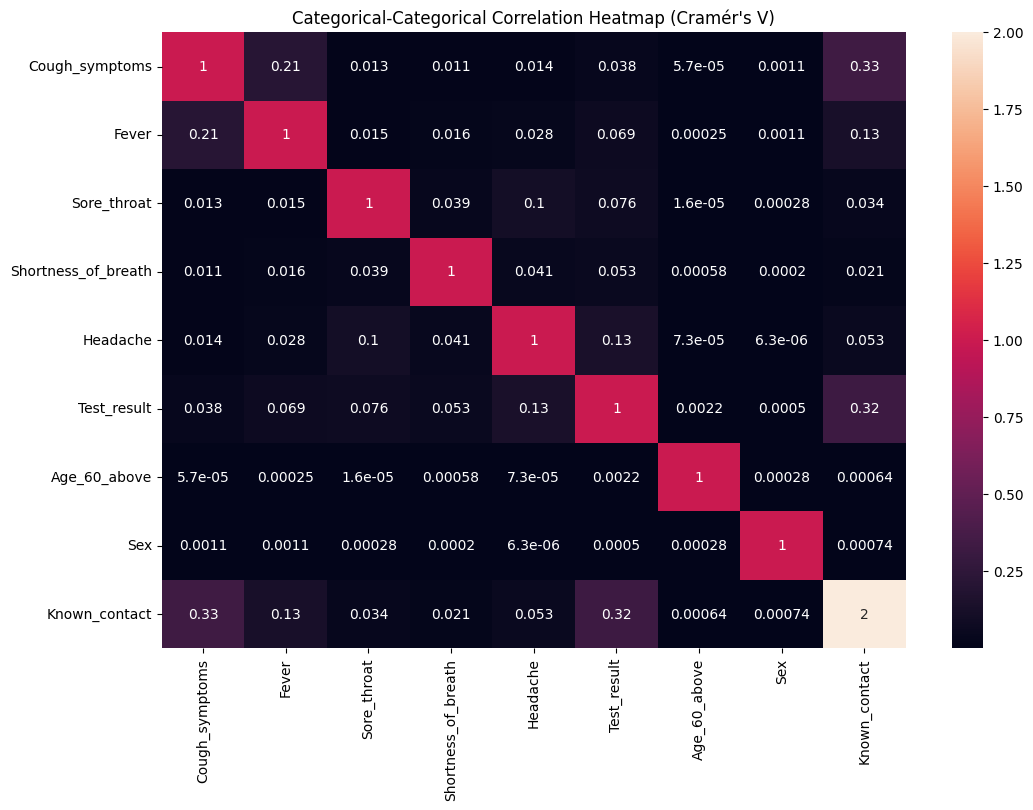

In [32]:
#check the between catogorical values
# Select relevant columns
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Test_result', 'Age_60_above', 'Sex', 'Known_contact']

# Calculate the Cramér's V statistic for categorical-categorical association
import scipy.stats as ss
cramer_v_matrix = np.zeros((len(categorical_columns), len(categorical_columns)))

for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        confusion_matrix = pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        cramers_v = ss.chi2_contingency(confusion_matrix)[0] / df.shape[0]
        cramer_v_matrix[i, j] = cramers_v

# Create a heatmap for the Cramér's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramer_v_matrix, annot=True, xticklabels=categorical_columns, yticklabels=categorical_columns)
plt.title('Categorical-Categorical Correlation Heatmap (Cramér\'s V)')
plt.show()

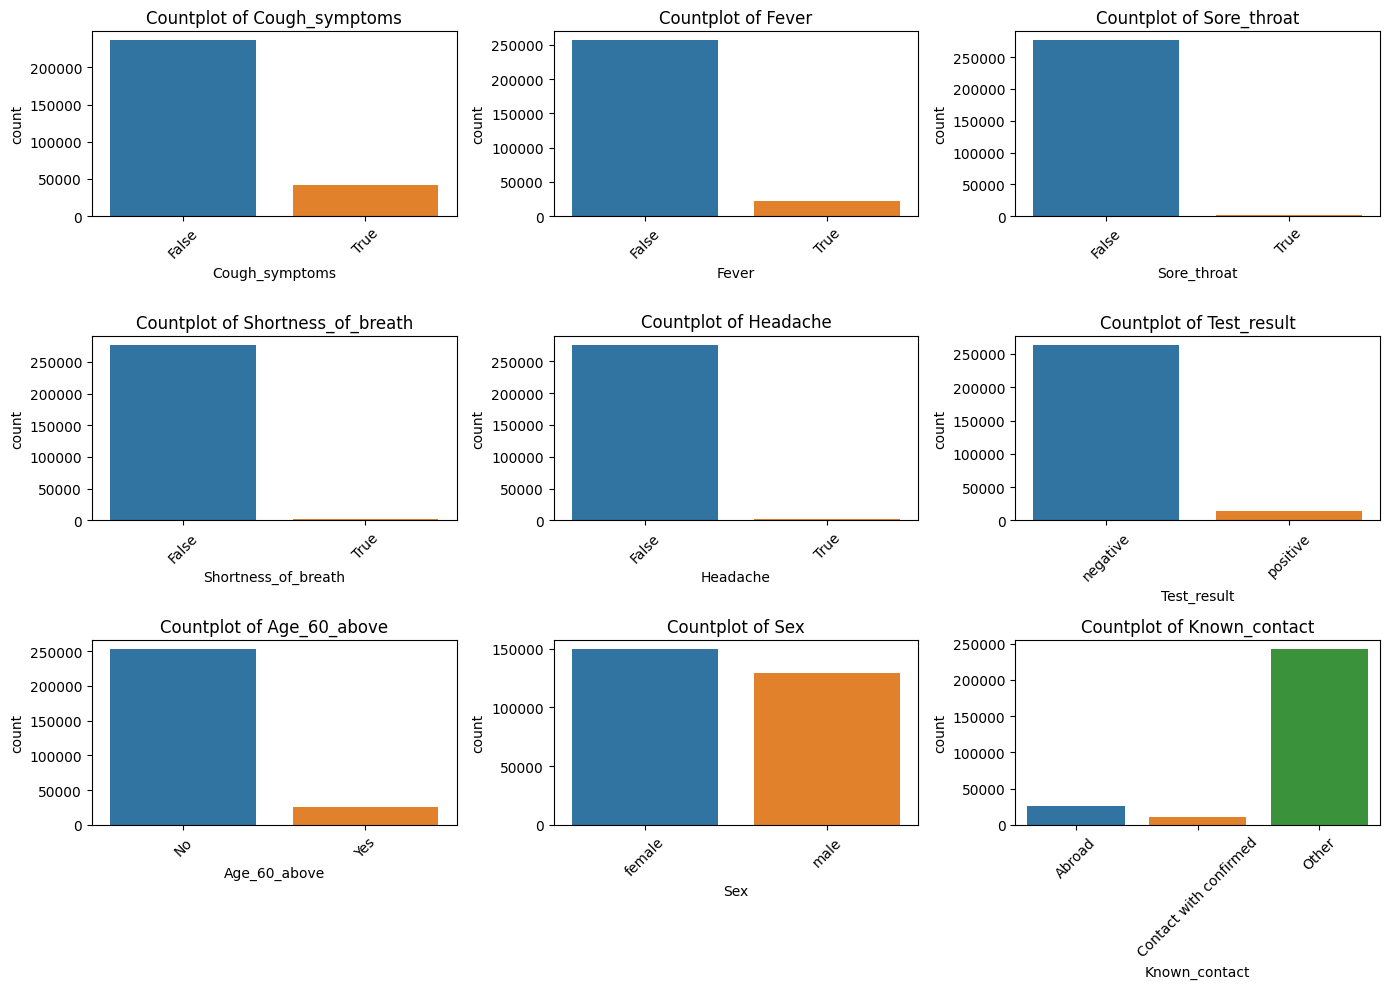

In [33]:
# Select relevant columns
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Test_result', 'Age_60_above', 'Sex', 'Known_contact']

# Plot countplots for each categorical variable
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**above observations point are below:**

1)Cough_symptoms are very low count
2) fever positive symptoms also low
3) above age of 60+ are very low

In [34]:
# Plot for Cough_symptoms vs 'Test_result'
fig = px.histogram(df, x='Test_result', color='Cough_symptoms', title=' Test Result vs Cough Symptoms')
fig.show()

above plot we see the count of cought symptoms highly are nigatives  and low are more negative for covid.

In [35]:
# Grouping data by 'Corona positive or negative' and aggregating symptoms counts
grouped_data = df.groupby('Test_result')[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum().reset_index()

# Create the grouped bar chart
fig = px.bar(grouped_data, x='Test_result', y=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'],
             title='Symptoms vs. Corona status',
             labels={'Value': 'Count'},
             barmode='group')

# Show the chart
#sometime inline charts are not displayed then use below argument for show
#fig.show(renderer='notebook')
fig.show()

This graph shows the percentage of people who have symptoms of COVID-19, broken down by their corona status (positive, negative, or variable). The data is from a study of over 35,000 people.

The graph shows that the most common symptom of COVID-19 is a cough, which is present in 42.5% of positive cases. Other common symptoms include fever (38.4%), sore throat (33.3%), shortness of breath (28.1%), and headache (26.7%).

The graph also shows that a significant number of positive cases (16.7%) are asymptomatic, meaning they have no symptoms at all. This is why it is important to get tested for COVID-19 even if you are not feeling sick.

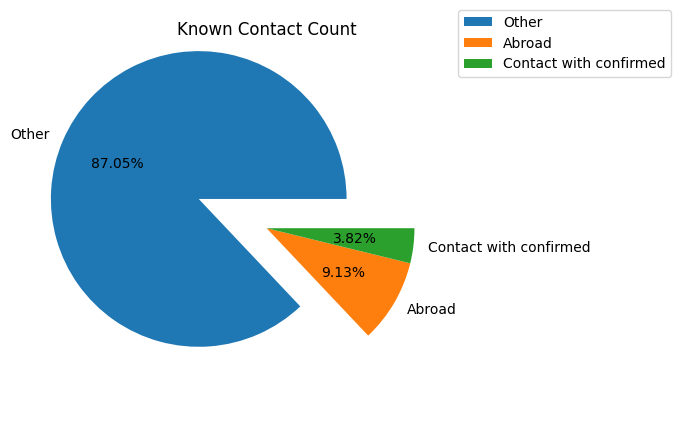

In [36]:
# Visualising with Pie chart

d = df['Known_contact'].value_counts()
v = ['Other','Abroad','Contact with confirmed']
explode = (.5,0,0)
plt.pie(d,labels=v, autopct='%1.2f%%', explode = explode)
plt.title("Known Contact Count")

# Adding legend outside the pie plot
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
# plt.legend()
plt.show()

# Data_Encoding

In [37]:
# Assuming 'Cough_symptoms' column contains boolean values
df['Cough_symptoms'] = df['Cough_symptoms'].astype(int)

In [38]:
# for unique values we reassign True = 1, False = 0
df['Fever'] = df['Fever'].astype(int)


In [39]:
# for unique values we reassign True = 1, False = 0
df['Sore_throat'] = df['Sore_throat'].astype(int)


In [40]:
# for unique values we reassign True = 1, False = 0
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(int)

In [41]:
# for unique values we reassign True = 1, False = 0
df['Headache'] = df['Headache'].astype(int)

In [42]:
# for unique values we reassign positive = 1, False = 0
df['Test_result'] = df['Test_result'].map({'positive':1, 'negative':0})

In [43]:
# for unique values we reassign yes = 1, no = 0
df['Age_60_above'] = df['Age_60_above'].map({'Yes':1, 'No':0})

In [44]:
# for unique values we reassign female = 1, male = 0
df['Sex'] = df['Sex'].map({'female':1, 'male':0})


In [45]:
# for unique values we reassign other = 1, Abroad = 2, contact with confrmed = 3
df['Known_contact'] = df['Known_contact'].map({'Other':1, 'Abroad':2, 'Contact with confirmed':3})

Only one column are test date  are convert date datatype

In [46]:
df['Test_date']=pd.to_datetime(df['Test_date'], format="%d-%m-%Y")

In [47]:
#displays unique values and its count for each and every column
for i in columns:
    print(i)
    print(df[i].unique())
    print()

Fever
[0 1]

Sore_throat
[1 0]

Shortness_of_breath
[0 1]

Headache
[0 1]



In [48]:
df.head()

ID  Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0   1 2020-03-11               1      0            1                    0   
1   2 2020-03-11               0      1            0                    0   
2   3 2020-03-11               0      1            0                    0   
3   4 2020-03-11               1      0            0                    0   
4   5 2020-03-11               1      0            0                    0   

   Headache  Test_result  Age_60_above  Sex  Known_contact  
0         0            0             0    1              2  
1         0            1             0    1              2  
2         0            1             0    1              2  
3         0            0             0    1              2  
4         0            0             0    1              3

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  int64         
 3   Fever                278848 non-null  int64         
 4   Sore_throat          278848 non-null  int64         
 5   Shortness_of_breath  278848 non-null  int64         
 6   Headache             278848 non-null  int64         
 7   Test_result          278848 non-null  int64         
 8   Age_60_above         278848 non-null  int64         
 9   Sex                  278848 non-null  int64         
 10  Known_contact        278848 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 23.4 MB


# Split the data for Model training

In [50]:
df.shape

(278848, 11)

In [51]:
df.columns

Index(['ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Test_result', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

#As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation.
#And , data from 20th April to 30th april as Test Set.

In [52]:
break_date = pd.Timestamp("2020-04-15")
df_Till_15_apr = df[df["Test_date"] <= break_date]
df_20_to_30_apr = df[df["Test_date"] > break_date]

In [53]:
df_Till_15_apr

ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
0            1 2020-03-11               1      0            1   
1            2 2020-03-11               0      1            0   
2            3 2020-03-11               0      1            0   
3            4 2020-03-11               1      0            0   
4            5 2020-03-11               1      0            0   
...        ...        ...             ...    ...          ...   
163184  163185 2020-04-15               0      0            0   
163185  163186 2020-04-15               0      0            0   
163186  163187 2020-04-15               0      0            0   
163187  163188 2020-04-15               0      0            0   
163188  163189 2020-04-15               0      0            0   

        Shortness_of_breath  Headache  Test_result  Age_60_above  Sex  \
0                         0         0            0             0    1   
1                         0         0            1             0    1   
2                         0         0            1             0    1   
3                         0         0            0             0    1   
4                         0         0            0             0    1   
...                     ...       ...          ...           ...  ...   
163184                    0         0            0             0    0   
163185                    0         0            0             0    0   
163186                    0         0            0             0    1   
163187                    0         0            0             0    0   
163188                    0         0            0             0    0   

        Known_contact  
0                   2  
1                   2  
2                   2  
3                   2  
4                   3  
...               ...  
163184              1  
163185              1  
163186              1  
163187              1  
163188              1  

[163189 rows x 11 columns]

In [54]:
df_20_to_30_apr

ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
163189  163190 2020-04-16               1      0            0   
163190  163191 2020-04-16               0      0            0   
163191  163192 2020-04-16               1      0            0   
163192  163193 2020-04-16               0      0            0   
163193  163194 2020-04-16               0      0            0   
...        ...        ...             ...    ...          ...   
278843  278844 2020-04-30               0      0            0   
278844  278845 2020-04-30               0      0            0   
278845  278846 2020-04-30               0      0            0   
278846  278847 2020-04-30               0      0            0   
278847  278848 2020-04-30               0      0            0   

        Shortness_of_breath  Headache  Test_result  Age_60_above  Sex  \
163189                    0         0            0             0    1   
163190                    0         0            0             0    1   
163191                    0         0            0             0    1   
163192                    0         0            0             0    0   
163193                    0         0            0             0    0   
...                     ...       ...          ...           ...  ...   
278843                    0         0            1             0    0   
278844                    0         0            0             0    1   
278845                    0         0            0             0    0   
278846                    0         0            0             0    0   
278847                    0         0            0             0    1   

        Known_contact  
163189              2  
163190              1  
163191              2  
163192              1  
163193              1  
...               ...  
278843              1  
278844              1  
278845              1  
278846              1  
278847              1  

[115659 rows x 11 columns]

In [55]:
#dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train
X_train = df_Till_15_apr.drop(columns = ['ID', 'Test_date', 'Test_result'],axis = 1)
X_train

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
163184               0      0            0                    0         0   
163185               0      0            0                    0         0   
163186               0      0            0                    0         0   
163187               0      0            0                    0         0   
163188               0      0            0                    0         0   

        Age_60_above  Sex  Known_contact  
0                  0    1              2  
1                  0    1              2  
2                  0    1              2  
3                  0    1              2  
4                  0    1              3  
...              ...  ...            ...  
163184             0    0              1  
163185             0    0              1  
163186             0    1              1  
163187             0    0              1  
163188             0    0              1  

[163189 rows x 8 columns]

In [56]:
#storing outcome variable in y_train.

y_train =df_Till_15_apr['Test_result']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Test_result, Length: 163189, dtype: int64

In [57]:
#dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.
X_test = df_20_to_30_apr.drop(columns = ['ID', 'Test_date','Test_result'],axis=1)
X_test

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
163189               1      0            0                    0         0   
163190               0      0            0                    0         0   
163191               1      0            0                    0         0   
163192               0      0            0                    0         0   
163193               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

        Age_60_above  Sex  Known_contact  
163189             0    1              2  
163190             0    1              1  
163191             0    1              2  
163192             0    0              1  
163193             0    0              1  
...              ...  ...            ...  
278843             0    0              1  
278844             0    1              1  
278845             0    0              1  
278846             0    0              1  
278847             0    1              1  

[115659 rows x 8 columns]

In [58]:
#storing Outcome variable test Set data into y_test.
y_test = df_20_to_30_apr['Test_result']
y_test

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Test_result, Length: 115659, dtype: int64

# Train and test Find out the shape

In [59]:
#As we have to divide into 4:1 means 20%
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [60]:
#Training Set
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#Validation Set
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (130551, 8)
y_train shape: (130551,)
X_test shape: (115659, 8)
y_test shape: (115659,)
X_val shape: (32638, 8)
y val shape: (32638,)


# Feature Selction

Here there are catogorical varibles so we use chi2_contingency :

The chi2_contingency test is used to determine whether there is a significant association between two categorical variables. Before using this test, it's important to have a specific research question or hypothesis related to the relationship between these variables.

In [61]:
from scipy.stats import chi2_contingency

In [62]:
columns = ['ID','Test_date','Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']
for i in columns:

    #creating a cotingency table
    contingency_table = pd.crosstab(df[i],df["Test_result"])
    # pd.crosstab- It is a useful tool for analyzing the relationships between different categorical variables in your dataset.

    # perform chi-square test, calculating p-value
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    #prints the results
    print("-----{}-----".format(i))
    print("chi-square statistic: ",chi2)
    print("p_value = ",p_value)

-----ID-----
chi-square statistic:  278847.99999999994
p_value =  0.4991096512866681
-----Test_date-----
chi-square statistic:  4498.032907406993
p_value =  0.0
-----Cough_symptoms-----
chi-square statistic:  10569.415074648161
p_value =  0.0
-----Fever-----
chi-square statistic:  19378.570935486066
p_value =  0.0
-----Sore_throat-----
chi-square statistic:  21183.30774235602
p_value =  0.0
-----Shortness_of_breath-----
chi-square statistic:  14873.153774171122
p_value =  0.0
-----Headache-----
chi-square statistic:  37078.834270861014
p_value =  0.0
-----Age_60_above-----
chi-square statistic:  600.9907438227524
p_value =  1.0193061909600926e-132
-----Sex-----
chi-square statistic:  140.4145884069575
p_value =  2.1604974877258956e-32
-----Known_contact-----
chi-square statistic:  90331.28046978849
p_value =  0.0


# Machine Learning Algorithms

Observations: We need to predict whether Covid-19 test will be positive or negative, basically categorcial output. So we can use algorithsm which are best for categorical output here.

Here we are going to use following 4 algorithms:-

Logistic Regression,
Decision Tree,
Random Forest,
K Nearest Neighbors
and after comparing all algorithms we will decide which is best fit algorithm for our dataset.

# Decision Tree Algorithm

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtree = DecisionTreeClassifier()

In [65]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
DecisionTreeClassifier()

DecisionTreeClassifier()

# - Predicting the model

In [67]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

# - Evaluation of the Model

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



In [70]:
print(confusion_matrix(y_test, predictions))

[[112610    351]
 [  1523   1175]]


In [71]:
accuracy = dtree.score(X_test, y_test)
accuracy

0.9837971969323616

check the prediced accuracy through calulations

In [72]:
112610+351+1523+1175

115659

In [73]:
(112610+1175)/115659

0.9837971969323616

**Observation**: Here our model predicted 98.37% accuracy with Decision Tree algorithm.

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

# n_estimators = 100 means our forest consists 100 trees.

RandomForestClassifier()

In [75]:
RandomForestClassifier()

RandomForestClassifier()

In [76]:
rfc_pred = rfc.predict(X_test)

In [77]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    112961
           1       0.77      0.44      0.56      2698

    accuracy                           0.98    115659
   macro avg       0.88      0.72      0.77    115659
weighted avg       0.98      0.98      0.98    115659



In [78]:
print(confusion_matrix(y_test, rfc_pred))

[[112609    352]
 [  1523   1175]]


In [79]:
accuracy = rfc.score(X_test, y_test)
accuracy

0.9837885508261355

**Observation**: Here our model predicted 98.37% accuracy with Random forest.

# Logistic Regression Algorithm

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Fitting Logistics Regression to Training Dataset

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Here we pass both X_train, y_train because model has to learn from existing values.

LogisticRegression()

In [82]:
LogisticRegression()

LogisticRegression()

Predicting the Test set results

In [83]:
y_pred = lr.predict(X_test)
y_pred

# we will pass only X_test. we will not pass y_test becuase that our model will predict.

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix evaluation

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112802,    159],
       [  2370,    328]])

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    112961
           1       0.67      0.12      0.21      2698

    accuracy                           0.98    115659
   macro avg       0.83      0.56      0.60    115659
weighted avg       0.97      0.98      0.97    115659



In [86]:
accuracy = lr.score(X_test, y_test)
accuracy

0.9781339973542915

**Observation**: Here our model predicted 97.81% accuracy with Logistic Regression Algorithm

# K Nearest Neighbors (KNN) Algorithm


In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
KNeighborsClassifier()

KNeighborsClassifier()

Predicting the Test set results

In [89]:
y_pred = classifier.predict(X_test)

Evaluating the Model by creating a Confusion Matrix & Classification Report

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112640,    321],
       [  1885,    813]])

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    112961
           1       0.72      0.30      0.42      2698

    accuracy                           0.98    115659
   macro avg       0.85      0.65      0.71    115659
weighted avg       0.98      0.98      0.98    115659



Predicting Accuracy of our model

In [92]:
accuracy = classifier.score(X_test, y_test)
accuracy

0.9809266896653093

**Observation**: Here our model predicted 98.09% accuracy with KNN.

# Observation

**Accuracy of our 4 Algorithms:-**

1. Decision Tree = 98.37%

2. Random Forest = 98.37%

3. Logistic Regression = 97.81%

4. K Nearest Neighbors Algorithms = 97.42%

From above results we can observe that accuracy of our 4 Algorithms are very close to each other. If we compare all then we can conclude that 'Decision Tree' or 'Random Forest' Algorithm are best for our Covid-19 dataset.

# Testing our ML model to predict result.

 'Cough_symptoms' (TRUE = 1 , FALSE = 0)

'FEVER' (TRUE = 1 , FALSE = 0)

 'Sore_throat' (TRUE = 1 , FALSE = 0)

 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)

 'Headache' (TRUE = 1 , FALSE = 0)

 'Corona' (Positive =1 , Negative = 0)

 'Age_60_above' (No=0 , Unknown = 1 , Yes = 2)

 Sex (Unknown=0, Female=1, Male=2)

 Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [93]:
# this input data basically contains random values
input_data = (1,1,1,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
# std_data = sc.transform(input_data_reshaped)
# print(std_data)

# fro Random Forest algorithm
prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[1]
The person is corona positive


# Visualising accuracy of our ML Algorithms

In [94]:
import plotly
import pandas as pd
import plotly.express as px

In [95]:

fig = px.bar(x=['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors'],
             y=[98.37, 98.37, 97.81, 97.42],
             text=[98.37, 98.37, 97.81, 97.42],
             labels={'x': 'Machine Learning Algorithms', 'y': 'Accuracy (%)'},
             title="Accuracy Percentage of Machine Learning Algorithms",
             color=['Decision Tree', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors'],
             color_discrete_map={'Decision Tree': 'darkred', 'Random Forest': 'lightcoral',
                                 'Logistic Regression': 'forestgreen', 'K-Nearest Neighbors': 'steelblue'})

# Add more styling
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.8)
fig.update_layout(font=dict(family="Arial, sans-serif", size=14, color="RebeccaPurple"),
                  title_font=dict(size=20, family="Arial, sans-serif", color="DarkSlateGray"),
                  legend=dict(title=dict(text='Algorithms', side='top'),
                              font=dict(family="Arial, sans-serif", size=12, color="grey")))

# Show the chart
fig.show()


# Visualising our Model Evaluation :

In [96]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have features X_train and labels y_train

# Define the number of splits (folds) for cross-validation
num_folds = 5

# Initialize a KFold object for splitting the data
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=kf)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print(f"Mean CV Score (Logistic Regression): {logistic_cv_scores.mean():.2f}")
print(f"Standard Deviation (Logistic Regression): {logistic_cv_scores.std():.2f}")

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=kf)
print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print(f"Mean CV Score (Decision Tree): {dt_cv_scores.mean():.2f}")
print(f"Standard Deviation (Decision Tree): {dt_cv_scores.std():.2f}")

# Random Forest
rf_model = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf)
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print(f"Mean CV Score (Random Forest): {rf_cv_scores.mean():.2f}")
print(f"Standard Deviation (Random Forest): {rf_cv_scores.std():.2f}")

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=kf)
print("\nK-Nearest Neighbors Cross-Validation Scores:", knn_cv_scores)
print(f"Mean CV Score (KNN): {knn_cv_scores.mean():.2f}")
print(f"Standard Deviation (KNN): {knn_cv_scores.std():.2f}")

Logistic Regression Cross-Validation Scores: [0.95185937 0.94810417 0.94944466 0.95143623 0.94821907]
Mean CV Score (Logistic Regression): 0.95
Standard Deviation (Logistic Regression): 0.00

Decision Tree Cross-Validation Scores: [0.95783386 0.95480659 0.95706626 0.95794715 0.95553428]
Mean CV Score (Decision Tree): 0.96
Standard Deviation (Decision Tree): 0.00

Random Forest Cross-Validation Scores: [0.95794876 0.95503638 0.95737265 0.95817694 0.95580237]
Mean CV Score (Random Forest): 0.96
Standard Deviation (Random Forest): 0.00

K-Nearest Neighbors Cross-Validation Scores: [0.93937421 0.95116813 0.95235542 0.95047874 0.94469552]
Mean CV Score (KNN): 0.95
Standard Deviation (KNN): 0.00


Logistic Regression Cross-Validation Scores: [0.95185937 0.94810417 0.94944466 0.95143623 0.94821907]

Mean CV Score (Logistic Regression): 0.95
Standard Deviation (Logistic Regression): 0.00

Decision Tree Cross-Validation Scores: [0.95783386 0.95480659 0.95706626 0.95794715 0.95553428]

Mean CV Score (Decision Tree): 0.96
Standard Deviation (Decision Tree): 0.00

Random Forest Cross-Validation Scores: [0.95791046 0.95503638 0.95721946 0.95810034 0.95576408]

Mean CV Score (Random Forest): 0.96
Standard Deviation (Random Forest): 0.00

K-Nearest Neighbors Cross-Validation Scores: [0.9454636  0.95078514 0.94722329 0.94025278 0.9458445 ]

Mean CV Score (KNN): 0.95
Standard Deviation (KNN): 0.00

# Observation :

A standard deviation of zero (0.00) in cross-validation scores usually indicates that the model's performance is consistent across different folds of the cross-validation process. In other words, the model is consistently making predictions with very similar accuracy across all subsets of the data.

In [97]:
import plotly.express as px

# Assuming you have already performed cross-validation as in your previous code

# Define the models and their respective cross-validation scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
cv_scores = [logistic_cv_scores, dt_cv_scores, rf_cv_scores, knn_cv_scores]

# Calculate mean and standard deviation for each model
mean_scores = [scores.mean() for scores in cv_scores]

# Create a DataFrame for plotting
import pandas as pd
df = pd.DataFrame({'Models': models, 'Mean CV Score': mean_scores})

# Create a bar chart using Plotly with custom colors
fig = px.bar(df, x='Models', y='Mean CV Score', text='Mean CV Score',
             title='Cross-Validation Scores',
             labels={'Models': 'Models', 'Mean CV Score': 'Mean CV Score'},
             color='Models',
             color_discrete_map={'Logistic Regression': 'darkgreen',
                                 'Decision Tree': 'darkblue',
                                 'Random Forest': 'darkorange',
                                 'K-Nearest Neighbors': 'darkred'})

# Customize the layout
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside', marker_line_color='black', marker_line_width=1.5, opacity=0.8)
fig.update_layout(font=dict(family="Arial, sans-serif", size=14, color="RebeccaPurple"),
                  title_font=dict(size=20, family="Arial, sans-serif", color="DarkSlateGray"),
                  legend=dict(title=dict(text='Models', side='top'),
                              font=dict(family="Arial, sans-serif", size=12, color="grey")))

# Show the plot
fig.show()


# **Observation :**

Through cross-validation scoring, we obtained the following mean accuracy scores:

Logistic Regression = 94.98%

Decision Tree = 95.66%

Random Forest = 95.68%

K Nearest Neighbors Algorithm = 94.59%

Upon close examination, it's evident that the accuracies of all four algorithms are quite similar. Upon comparison, it is apparent that the 'Random Forest' algorithm outperforms the others, making it the most suitable choice for our Covid-19 dataset.